GROUP NUMBER 3
Members:
1. TONNY KAWUKI
2. SENTONGO PAUL
3. DIANA NAKIMBUGWE KIRABO
4. JACOB
5. ALEX KIBUUKA

Starting our work by importing the necessary libraries for both EDA and machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

we use the function below to read the dataset

In [2]:
df = pd.read_excel('DiamondPricesData.xlsx')

In [3]:
df.head(10)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


we use the above function to see the topmost portion of our dataset, which includes the first 10 rows. This can be helpful to quickly inspect the structure and content of the dataset

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


From the results above, we note that we have 3 categorical variabes which are Cut, Color and Clarity. while the rest are continious variables.

In [4]:
#descring the variables in the dataset
df.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53940.000000,53940.000000,53940,53934,53940,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11286,13065,NaN,NaN,NaN,NaN,NaN
mean,3932.799722,0.797940,NaN,NaN,NaN,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,NaN,NaN,NaN,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


From the results above we note that the categorical variables have 5, 7 and 8 unique categories that we may need to code, and the continious variables we get the mean, minimum value and maximum values.

In [5]:
#checking for missing values in the dataset
df.isna().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

From the results above, we note that the daaset has 6 missing values under color and 14 missing values in depth. Since these missing values are very few and less than 30% of the dataset we decide to delete them.

In [30]:
#dropping the missing values
df = df.dropna()
df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

We note no missing values in the data set.

From below, we are visualising the dataset and to see clearly how the data is distributed amongst different variables and this can as well show us any identified outliers

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'carat'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

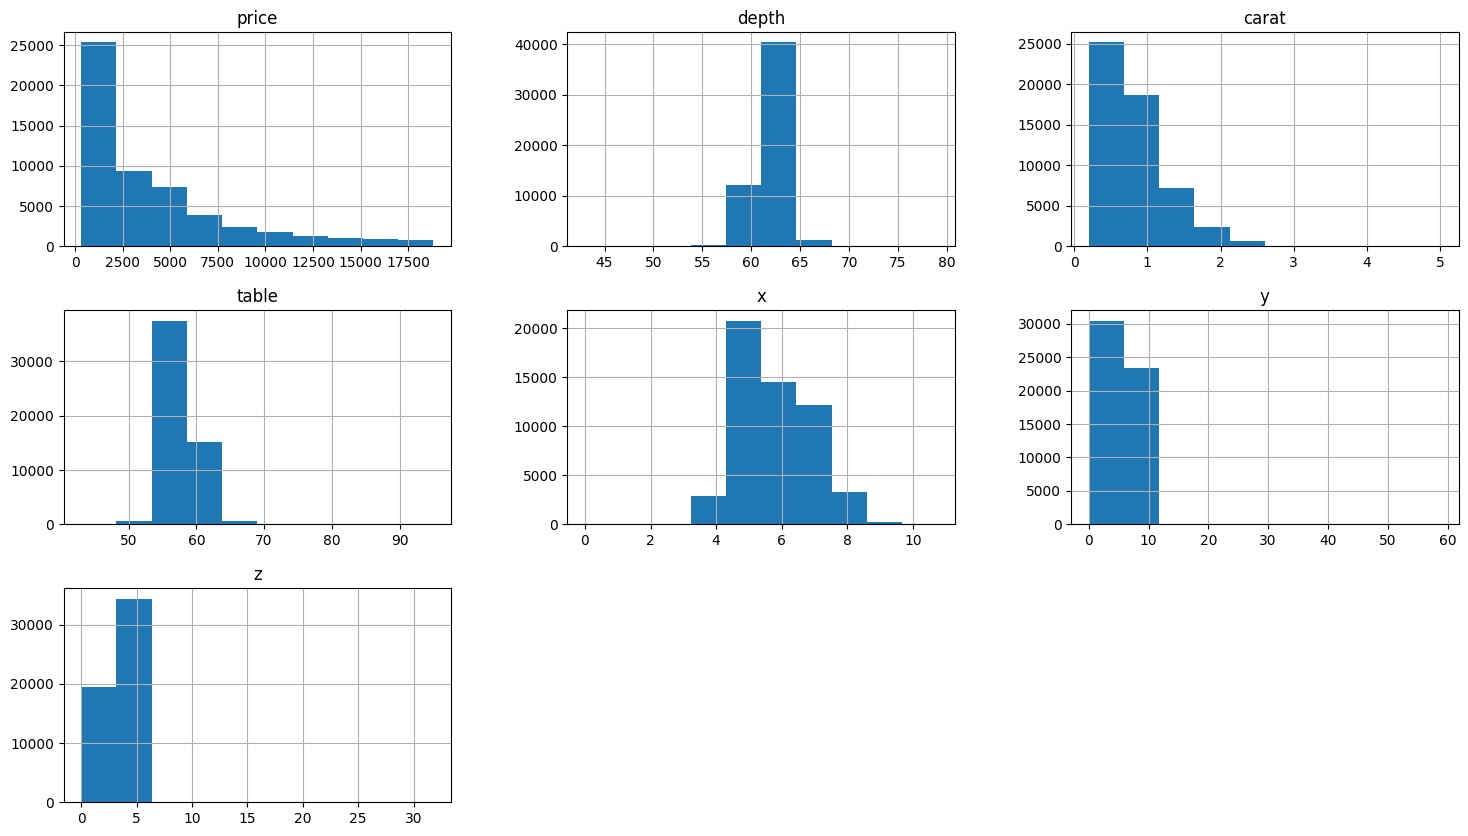

In [7]:
# to generate a histogram of multiple variables to see how data is distributed
# identifying outliers in price,table, carat, x,y,z.
df.hist(['price','depth', 'carat','table','x','y','z'], figsize=(18,10))

from above: we can visualise that;
-price and carat is skwed to the left and thus does not appear to have a normal distribution
-Carat is Positively-skewed i.e. mean>median
-Table and depth appear to have some sort of a normal distribution but also depth apears to have some outliers
Z and Y show that the distribution is kwed while X appears to have a normal distribution. however we need to confirm these with statistical tests.

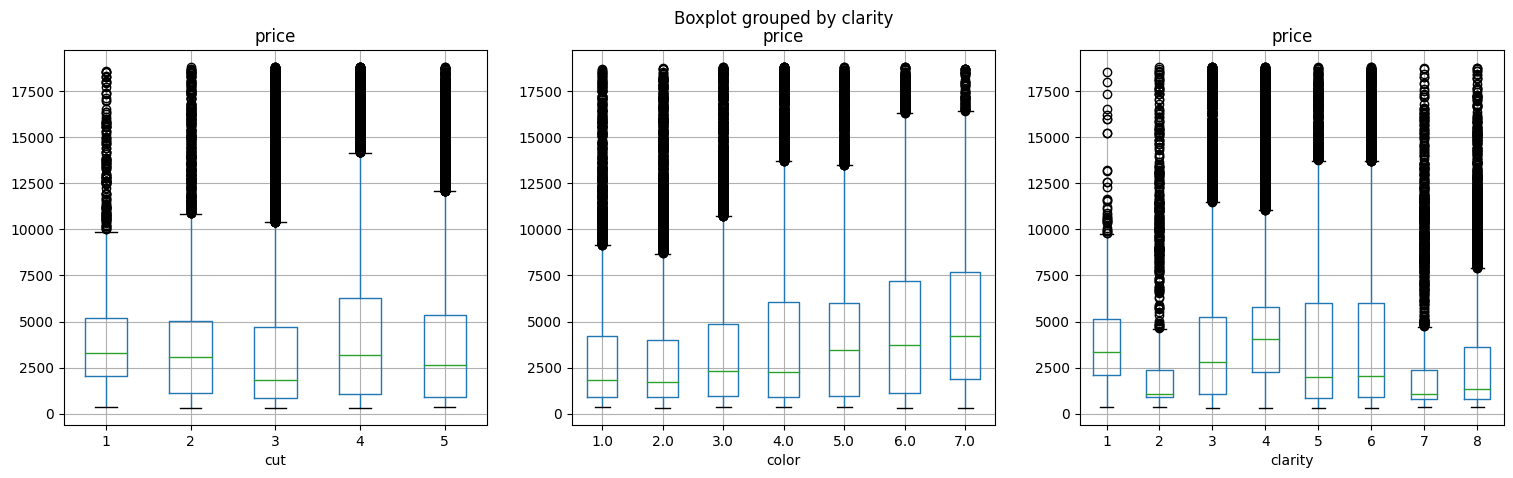

In [31]:
#The function below outputs a box plot that we use to visualise the relationships described above
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

from the above: Under price with CUT we note that ideal has a lower midean than premium and Price with color, I has the highest mediuan with no indication of outliers. However with Price and Clarity under I1. the distribution of the values appears to have a huge variance which maybe an indication outliers. we shall use statistical measures to conclude on the distribution we observe.

we have agreed that our target variable should be price and below we further examine the distribution of all continuous variables vs price: we want to find out which variables have a high correlation vs price and hence to focus on those variables to be used for our machine learning models

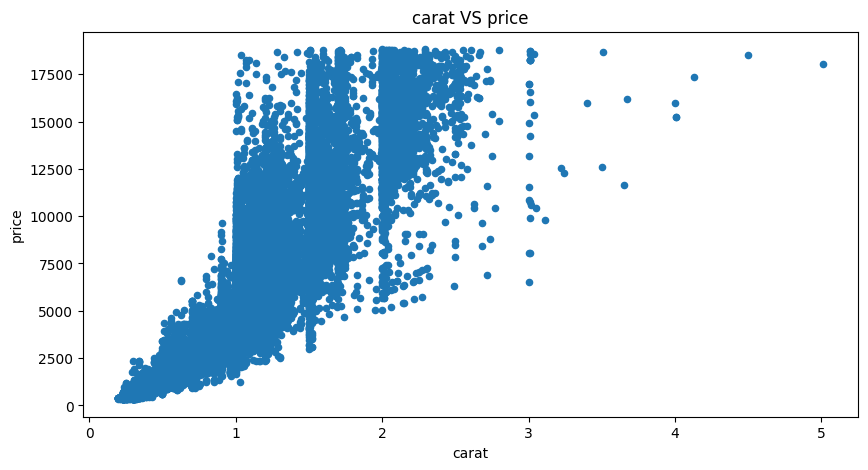

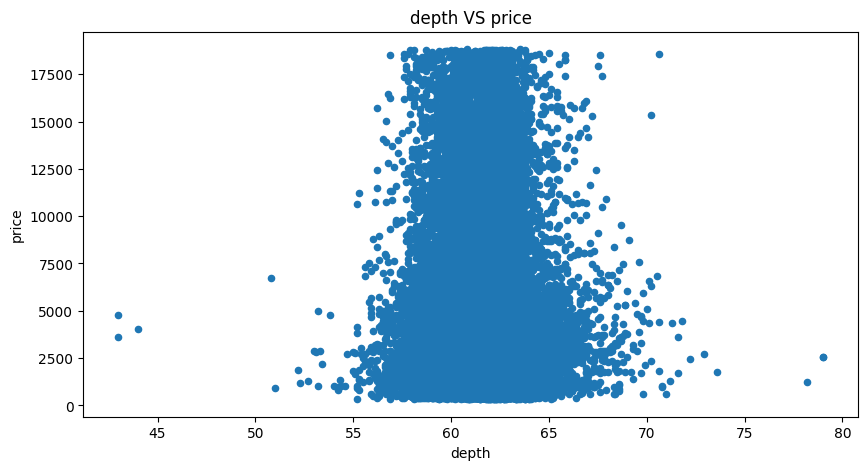

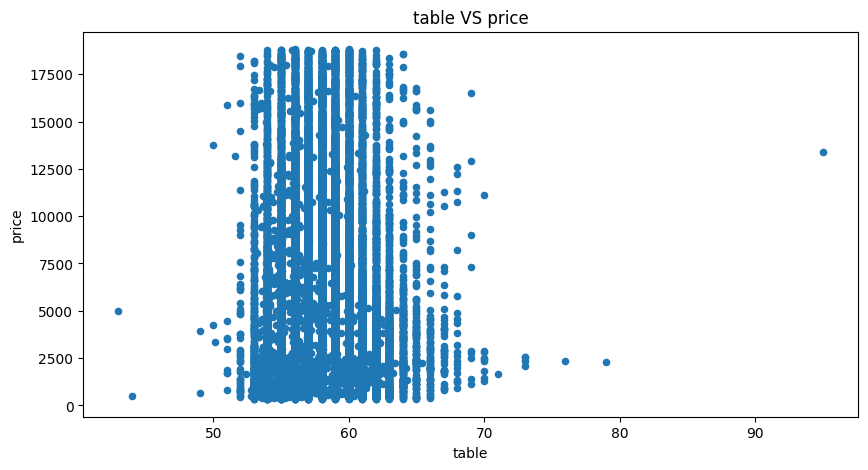

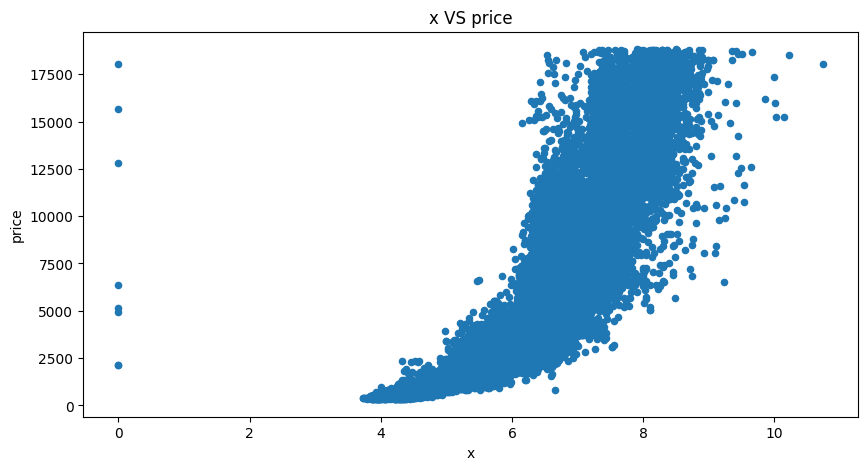

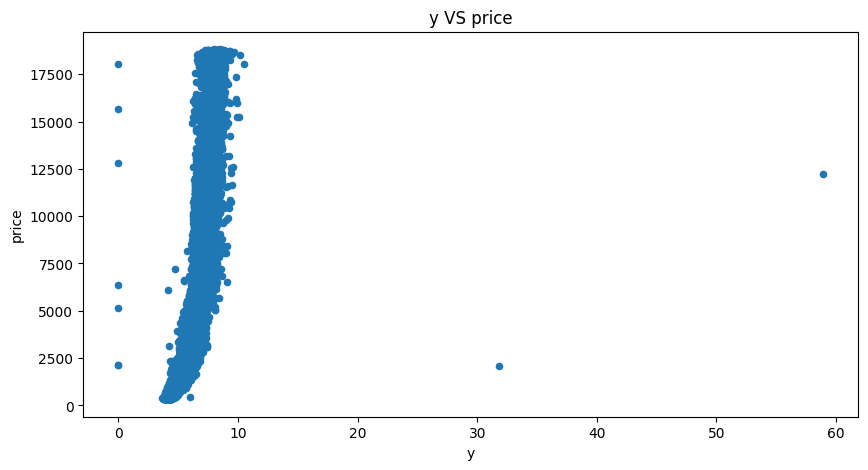

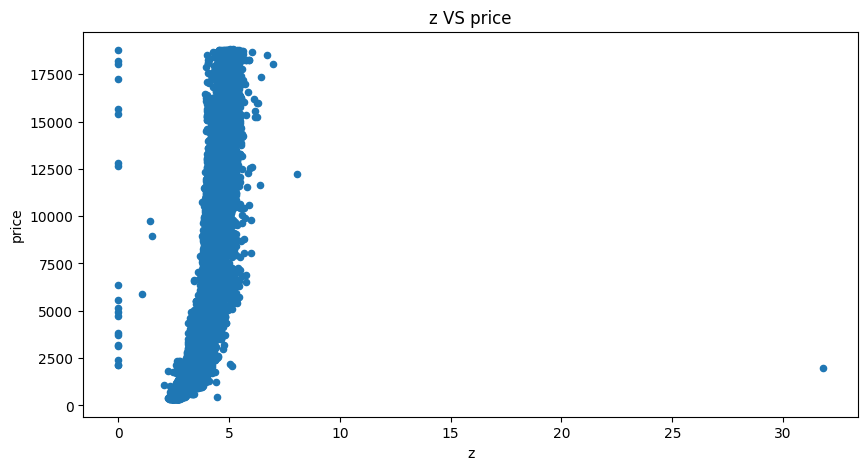

In [32]:
#Visual display of scatterplot for continuos variables vs price
#Plotting scatterplot for each continuos column values
#Therefore the target variable is "price"

ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

from the above, it is hard to explain the trends of distribution and this calls for further statistical examination by running a correlation matrix. the scatter plots provide an indication of positive relationships such as carat Vs Price however we have many indications of outliers. Z VS Price values above 8 to 30 in z appear to be outliers. Under Y VS Price, values of Y at 0 and those values after 30 to 60. XVS Price the values of Price at X =0 appear to be outliers too. We shall need to impute for them. Table and depth too VS price provide indications of the same.

In [33]:
#Correlation matrix between variables price carat depth and table, x, y,z
# Calculating correlation matrix
ContinuousVariables=['price', 'carat', 'depth', 'table','x','y','z']

# Creating the correlation matrix
CorrelationData=df[ContinuousVariables].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921590,-0.010675,0.127270,0.884460,0.865438,0.861260
carat,0.921590,1.000000,0.028249,0.181758,0.975104,0.951725,0.953389
depth,-0.010675,0.028249,1.000000,-0.295505,-0.025224,-0.029292,0.094958
table,0.127270,0.181758,-0.295505,1.000000,0.195471,0.183890,0.151096
x,0.884460,0.975104,-0.025224,0.195471,1.000000,0.974695,0.970770
y,0.865438,0.951725,-0.029292,0.183890,0.974695,1.000000,0.951997
z,0.861260,0.953389,0.094958,0.151096,0.970770,0.951997,1.000000


Correlation values range from -1 to +1 indicating very strong negative or positive correlation.
In statistical terms, the correlation coefficient ranges from -1 to +1.

Values close to +1 (e.g., 0.921591, 0.884435, 0.865421, etc.) indicate a strong positive correlation. For example, the variables "price" and "carat" have a correlation coefficient of 0.921591, suggesting a strong positive linear relationship between them. The variables "depth" and "table" have a correlation coefficient of -0.295734, suggesting a strong negative relationship between them.

Values close to 0 (e.g., -0.010647, 0.127134, etc.) indicate a weak or no linear correlation. For example, the variables "price" and "depth" have a correlation coefficient of -0.010647, suggesting a very weak or no linear relationship between them.

the function below filters columns that have strong correlation vs the target variable price by focusing on 
any correlation value above 0.5.
By using the function below, we are extracting the subset of values in the 'price' column that are strongly correlated (positively or negatively) with other variables in the dataset. This can be useful for further analysis or visualization, focusing on the most impactful relationships involving the 'price' variable.

In [34]:
# Filtering only those columns where absolute correlation > 0.5 with the Target Variable "price"
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.000000
carat    0.921590
x        0.884460
y        0.865438
z        0.861260
Name: price, dtype: float64

to test the relationship amongst all categorical colums vs target variable price: we use anova test.
By performing an ANOVA test, we can determine if there are significant differences among the means of the variables being compared. If the null hypothesis is rejected, it indicates that at least one variable differs significantly from the others

we are using anova because it involves testing relationships between categorical and continuos variables

In [16]:
#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [18]:
#Or use the function to check all the categorical variables for their correlations with price
CategoricalPredictorList=['color', 'clarity', 'cut']
FunctionAnova(inpData=df, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316
cut is correlated with price | P-Value: 8.42830730759452e-150


['color', 'clarity', 'cut']

the overrall statistical analysis shows that there is correlation amongst color, clarity,cut,carat, x, y,z vs the target variable price and that confirms that all their data will be used for predictions and ML TECHNIQUES

DATA PRE PROCESSING FOR ML

This process involves converting all non numerical values into numerical and in the dataset,
non numeric values include cut	color	clarity values.


In [35]:
# Making cut Column contiunous data  
df["cut"].replace(["Fair", "Good", "Ideal","Premium","Very Good"], [1, 2, 3, 4, 5], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,2.0,4,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,2.0,3,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2.0,5,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,6.0,6,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7.0,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,1.0,3,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1.0,3,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,1.0,3,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,5.0,4,61.0,58.0,6.15,6.12,3.74


In [36]:
# Make color Column contiunous data  
df["color"].replace(["D", "E", "F","G","H","I","J","NA"], [1, 2, 3, 4, 5, 6, 7, 0], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,2.0,4,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,2.0,3,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2.0,5,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,6.0,6,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7.0,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,1.0,3,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1.0,3,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,1.0,3,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,5.0,4,61.0,58.0,6.15,6.12,3.74


In [37]:
# Make clarity Column contiunous data  
df["clarity"].replace(["I1", "IF", "SI1","SI2","VS1","VS2","VVS1","VVS2"], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,2.0,4,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,2.0,3,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2.0,5,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,6.0,6,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7.0,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,1.0,3,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1.0,3,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,1.0,3,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,5.0,4,61.0,58.0,6.15,6.12,3.74


In [38]:
# Generate the predictor input

X = df.drop(columns=["price"])
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,3,2.0,4,61.5,55.0,3.95,3.98,2.43
1,0.21,4,2.0,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,2.0,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,6.0,6,62.4,58.0,4.20,4.23,2.63
4,0.31,2,7.0,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,3,1.0,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,1.0,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,5,1.0,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,5.0,4,61.0,58.0,6.15,6.12,3.74


Our predictors data frame now includes carat, cut, color, clarity, depth, table, X, Y and Z

In [39]:
# Generate the target output

y = df['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53920, dtype: int64

In [40]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

We split the dataset into a traning and testing data set and also select a random start of 312

We then decide to use the linear regression model since the variable being predicated is a contionus variable.

In [44]:
# Importing the Linear Regression algorithm from sklearn
from sklearn.linear_model import LinearRegression

# Creating the Linear Regression model
LinearRegressionModel = LinearRegression()

# Fitting the Linear Regression model with Training data
LinearRegressionModel.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = LinearRegressionModel.predict(X_test)

# Importing the metrics from sklearn library
from sklearn.metrics import mean_squared_error, r2_score

# Calculating MSE
print('Model MSE is:', mean_squared_error(y_test, y_pred))

# Calculating R squared value
print('R2 score is:', r2_score(y_test, y_pred))

# Importing the statsmodel library
import statsmodels.api as sm

# Adding a constant to predictor variable
X_with_constant = sm.add_constant(X)

# Fitting the Linear Regression model with Training data
statsModel = sm.OLS(y, X_with_constant).fit()

# Printing all the parameters
print(statsModel.params)

# Printing the p-values for all the parameters
print(statsModel.pvalues)

# Printing the R-squared value for the model
print(statsModel.rsquared)

# Printing the overall model F-statistic
print(statsModel.fvalue)

Model MSE is: 1786632.082381864
R2 score is: 0.8862776381642515
const      15899.026148
carat      10976.913900
cut           70.754273
color       -266.476782
clarity      287.929083
depth       -154.270243
table        -93.329438
x          -1184.348841
y             47.322217
z             -1.686931
dtype: float64
const       0.000000e+00
carat       0.000000e+00
cut         5.144004e-34
color       0.000000e+00
clarity     0.000000e+00
depth      1.285178e-203
table      1.245344e-239
x          2.117674e-200
y           4.025970e-02
z           9.663974e-01
dtype: float64
0.8850678714400866
46127.715690590834


From the model above we have an R squared of 88.5% indicating that A high R-Squared value means that many data points are close to the linear regression function line that we have estimated.

In [45]:
#saving the model
import pickle
pickle.dump(LinearRegressionModel, open('diamonds.pkl','wb'))


We have saved the model as apickle

In [47]:
#loading the model
#using the model to predict the price of a diamonds in a new dataset

model = pickle.load(open('diamonds.pkl','rb'))


Load the model to start the prediction.